# Aim:

In this project, the objective is to determine whether a person makes over 50K a year. I implement Naive Bayes Classification with Python and Scikit-Learn. So, to fulfill the objective, I build a Naive Bayes classifier to predict whether a person makes over 50K a year.

# Dataset Description : 

I have used the Adult Data Set for this project, downloaded from the UCI Machine Learning Repository website. Below is the url to download the dataset

https://archive.ics.uci.edu/ml/datasets/Adult



# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import warnings

warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df = pd.read_csv('adult.data.csv', header=None, sep=',\s')

# Exploratory Data Analysis

In [3]:
# to check dimensions of the dataset

df.shape

(32561, 15)

We can see that there are 32561 instances and 15 attributes in the data set.

## To view first 5 rows of dataset

In [4]:
# preview the dataset

df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Renaming columns

We can see that the dataset does not have proper column names. The columns are labeled as 0,1,2.... and so on. We should give proper names to the columns to make dataset more readable.

In [5]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

In [6]:
# let's again preview the dataset to check if we have proper column names

df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Checking summary of the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


From the above output, We can see that there are no missing values in the dataset.

## Variable Types

The dataset has a mixture of categorical and numerical variables. Categorical variables have data type object. Numerical variables have data type int64.
Now I will segregate the dataset based on categorical and numerical variables. 

First, I will explore categorical variables.

In [8]:
## Exploring categorical variables

cat = [i for i in df.columns if df[i].dtype=='O']

print(len(cat))

print(cat)

9
['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


There are 9 categorical variables which was listed above.

In [9]:
# view the dataset only with categorical variables

df[cat].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


### Summary of categorical variables

1. There are 9 categorical variables.
2. The categorical variables are given by workclass, education, marital_status, occupation, relationship, race, sex, native_country and income.
3. income is the target variable.


## Checking for issues with categorical data

### 1. Missing values

In [10]:
# checking for  missing values in dataset with categorical variables

df[cat].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

There are no missing values in the categorical variables.

### 2. Frequency counts

In [11]:
# viewing the frequency counts of values of dataset with categorical variables

for i in cat: 
    print(df[i].value_counts())

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         377

In [12]:
# viewing frequency distribution of values of dataset with categorical variables

for i in cat: 
    
    print(df[i].value_counts()/np.float(len(df[i])))

Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: workclass, dtype: float64
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: education, dtype: float64
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: marital_status, dtype: float64


From the above two outputs, we can see that there are several variables like workclass, occupation and native_country which contain missing values. Usually, the missing values are coded as NaN and python will detect them with the usual command of df.isnull().sum().

But, in this case the missing values are coded as ?. Python fail to detect these as missing values because it do not consider ? as missing values. So, I have to replace ? with NaN so that Python can detect these missing values.

Fixing null values of these variables one by one.

#### 1. workclass variable

In [13]:
# checking labels in workclass variable

df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [14]:
# check frequency distribution of values in workclass variable

df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

There are 1836 values encoded as ? in workclass variable. I will replace these ? with NaN.

In [15]:
# replacing '?' values in workclass variable with `NaN`

df['workclass'].replace('?', np.NaN, inplace=True)

In [16]:
# again checking the frequency distribution of values in workclass variable

df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

Now, we can see that there are no values encoded as ? in the workclass variable.

Similarly I will replace '?' with Nan for variables occupation and native_country column.

In [17]:
df['workclass'].isnull().sum()

1836

#### 2. occupation variable

In [18]:
# checking unique labels in occupation variable

df.occupation.unique()

array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [19]:
# checking for frequency distribution of values of dataset for occupation variable

df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

There are 1843 values encoded as ? in occupation variable. I will replace these ? with NaN.

In [20]:
# replacing '?' values in dataset for occupation variable with `NaN`

df['occupation'].replace('?', np.NaN, inplace=True)

In [21]:
# again checking for the frequency distribution of values of dataset for occupation variable

df.occupation.value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [22]:
df['occupation'].isnull().sum()

1843

#### 3. native_country variable

In [23]:
# checkingn unique labels in native_country variable

df.native_country.unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [24]:
# checking for frequency distribution of values of dataset for native_country variable

df.native_country.value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

There are 583 values encoded as ? in native_country variable. I will replace these ? with NaN.

In [25]:
# replaceing '?' values in dataset for native_country variable with `NaN`

df['native_country'].replace('?', np.NaN, inplace=True)

In [26]:
# again check the frequency distribution

df.native_country.value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece                      

In [27]:
df['native_country'].isnull().sum()

583

### Checking for missing values in dataset with categorical variables again

In [28]:
df[cat].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that workclass, occupation and native_country variable contains missing values.

### Cardinality (The number of labels within a categorical variable)

In [29]:
# checking for cardinality in categorical variables

for i in cat:   
    print(i, ':', len(df[i].unique()))

workclass : 9
education : 16
marital_status : 7
occupation : 15
relationship : 6
race : 5
sex : 2
native_country : 42
income : 2


From the above output, we can see that native_country column contains relatively large number of labels as compared to other columns.
High cardinality may pose some serious problems in the machine learning model. I will fix this issue by encoding after the training and test dataset is splitted.


## Exploring Numerical Variables

In [30]:
# finding numerical variables and their count

num = [i for i in df.columns if df[i].dtype!='O']

print(len(num))

print(num)

6
['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


There are 6 numerical variables listed above

In [31]:
# viewing the dataset with numerical variables

df[num].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### Summary of numerical variables

1. There are 6 numerical variables.
2. These are given by age, fnlwgt, education_num, capital_gain, capital_loss and hours_per_week.
3. All of the numerical variables are of discrete data type.

## Checking for issues with numerical data

#### 1. Missing values


In [32]:
# checking for missing values in numerical variables

df[num].isnull().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

All the 6 numerical variables do not contain any missing values.

# Declaring feature vector and target variable

In [33]:
x = df.drop(['income'], axis=1)

y = df['income']

# Splitting dataset into separate training and test data

In [34]:
# splitting x and y into training and testing data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [35]:
# checking the shape of x_train and x_test

x_train.shape, x_test.shape

((22792, 14), (9769, 14))

# Feature Engineering

In [36]:
# checking data types of x_train

x_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [37]:
# display categorical variables

cat_new = [i for i in x_train.columns if x_train[i].dtypes == 'O']
cat_new

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [38]:
# display numerical variables

num_new = [i for i in x_train.columns if x_train[i].dtypes != 'O']

num_new

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

In [39]:
# printing percentage of missing values in the categorical variables in training set

x_train[cat_new].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [40]:
# print categorical variables with missing data

for i in cat_new:
    if x_train[i].isnull().mean()>0:
        print(i, (x_train[i].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [41]:
# impute missing categorical variables with most frequent value

for i in [x_train, x_test]:
    i['workclass'].fillna(x_train['workclass'].mode()[0], inplace=True)
    i['occupation'].fillna(x_train['occupation'].mode()[0], inplace=True)
    i['native_country'].fillna(x_train['native_country'].mode()[0], inplace=True)

In [42]:
# re-check missing values in categorical variables in x_train

x_train[cat_new].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

As a final check, I will check for missing values in x_train and x_test.

In [43]:
# check missing values in x_train & x_test
print('x_train Variables:')
print(x_train.isnull().sum())

print('x_test Variables:')
print(x_test.isnull().sum())

x_train Variables:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64
x_test Variables:
age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64


We can see that there are no missing values in x_train and x_test.

## Encode categorical variables

In [44]:
x_train[cat_new].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [45]:
# importing category encoders

import category_encoders as ce

In [46]:
# encoding variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)

In [47]:
x_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [48]:
x_test.shape

(9769, 105)

We now have training and testing set ready for model building. Before that, we should do feature scaling i.e mapping all the feature variables onto the same scale.

# Feature Scaling

In [49]:
cols = x_train.columns
cols

Index(['age', 'workclass_1', 'workclass_2', 'workclass_3', 'workclass_4',
       'workclass_5', 'workclass_6', 'workclass_7', 'workclass_8', 'fnlwgt',
       ...
       'native_country_32', 'native_country_33', 'native_country_34',
       'native_country_35', 'native_country_36', 'native_country_37',
       'native_country_38', 'native_country_39', 'native_country_40',
       'native_country_41'],
      dtype='object', length=105)

In [50]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

x_train = scaler.fit_transform(x_train)

x_test = scaler.transform(x_test)

In [51]:
x_train = pd.DataFrame(x_train, columns=[cols])


In [52]:
x_test = pd.DataFrame(x_test, columns=[cols])
x_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
0,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.006571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323136,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.656361,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.45,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.253496,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.042564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We now have x_train dataset ready to be fed into the Gaussian Naive Bayes classifier.

# Model training

In [53]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

# Predict the test set results

In [54]:
y_pred_test = gnb.predict(x_test)

y_pred_test

array(['<=50K', '<=50K', '>50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

# Check accuracy score

In [55]:
from sklearn.metrics import accuracy_score

acc_score_test = (accuracy_score(y_test, y_pred_test))
acc_score_test

0.8082710615211383

Here, y_test are the true class labels and y_pred_test are the predicted class labels in the test-set.

# Check for overfitting

In [56]:
y_pred_train = gnb.predict(x_train)

y_pred_train

array(['>50K', '<=50K', '>50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [57]:
acc_score_train = accuracy_score(y_train, y_pred_train)
acc_score_train

0.8067304317304317

In [58]:
score_train = gnb.score(x_train, y_train)
print('score_train:', score_train)

score_test = gnb.score(x_test, y_test)
print('score_test:',score_test)

score_train: 0.8067304317304317
score_test: 0.8082710615211383


The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.

# Comparing model accuracy with null accuracy

In [59]:
# check class distribution in test set

y_test.value_counts()

<=50K    7407
>50K     2362
Name: income, dtype: int64

In [60]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score:' , null_accuracy)

Null accuracy score: 0.7582147609786057


From above we can see that our model accuracy score is 0.8083 but null accuracy score is 0.7582. So, we can conclude that our Gaussian Naive Bayes Classification model is doing a very good job in predicting the class labels.

Now, based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.

But, it does not give the underlying distribution of values. Also, it does not tell anything about the type of errors our classifer is making. To check for errors, we will plot confusion matrix.

# Confusion matrix

In [61]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)
cm

array([[5999, 1408],
       [ 465, 1897]], dtype=int64)

True Positives(TP) =  5999

True Negatives(TN) =  1897

False Positives(FP) =  1408

False Negatives(FN) =  465

The confusion matrix shows (5999 + 1897) = 7896 correct predictions and (1408 + 465) = 1873 incorrect predictions.

In this case, we have

True Positives (Actual Positive:1 and Predict Positive:1) - 5999
True Negatives (Actual Negative:0 and Predict Negative:0) - 1897
False Positives (Actual Negative:0 but Predict Positive:1) - 1408 (Type I error)
False Negatives (Actual Positive:1 but Predict Negative:0) - 465 (Type II error)

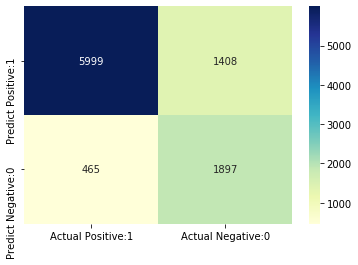

In [62]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

# Classification metrices

## Classification Report

In [63]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, y_pred_test)
print(class_report)

              precision    recall  f1-score   support

       <=50K       0.93      0.81      0.86      7407
        >50K       0.57      0.80      0.67      2362

    accuracy                           0.81      9769
   macro avg       0.75      0.81      0.77      9769
weighted avg       0.84      0.81      0.82      9769



## Classification accuracy

In [64]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy :' , classification_accuracy)

Classification accuracy : 0.8082710615211383


## Classification error

In [65]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error :' , classification_error)

Classification error : 0.19172893847886172


## Precision Score

In [66]:
# print precision score

precision = TP / float(TP + FP)

print('Precision :' , precision)

Precision : 0.8099095450249764


## Recall / True Positive rate

In [67]:
# print Recall / True Positive rate

recall = TP / float(TP + FN)

print('Recall :' , recall)

Recall : 0.9280631188118812


## Specificity

In [68]:
specificity = TN / (TN + FP)

print('Specificity:' , specificity)

Specificity: 0.5739788199697428


# Calculating class probabilities

In [69]:
# print the predicted probabilities of two classes- 0 and 1

y_pred_prob = gnb.predict_proba(x_test)

y_pred_prob

array([[9.99999426e-01, 5.74152436e-07],
       [9.99687907e-01, 3.12093456e-04],
       [1.54405602e-01, 8.45594398e-01],
       ...,
       [6.91619060e-17, 1.00000000e+00],
       [9.91757884e-01, 8.24211567e-03],
       [9.99999029e-01, 9.70554146e-07]])

### Observations


* In each row, the numbers sum to 1.


* There are 2 columns which correspond to 2 classes - <=50K and >50K.

  * Class 0 => <=50K - Class that a person makes less than equal to 50K.

  * Class 1 => >50K - Class that a person makes more than 50K.
  

* Importance of predicted probabilities

  * We can rank the observations by probability of whether a person makes less than or equal to 50K or more than 50K.
  
  
* predict_proba process

  * Predicts the probabilities

  * Choose the class with the highest probability
  

* Classification threshold level

  * There is a classification threshold level of 0.5.

  * Class 0 => <=50K - probability of salary less than or equal to 50K is predicted if probability < 0.5.

  * Class 1 => >50K - probability of salary more than 50K is predicted if probability > 0.5.
  

In [70]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - <=50K', 'Prob of - >50K'])

y_pred_prob_df

,Prob of - <=50K,Prob of - >50K
0,9.999994e-01,5.741524e-07
1,9.996879e-01,3.120935e-04
2,1.544056e-01,8.455944e-01
3,1.736243e-04,9.998264e-01
4,8.201210e-09,1.000000e+00
...,...,...
9764,1.440818e-10,1.000000e+00
9765,2.177021e-59,1.000000e+00
9766,6.916191e-17,1.000000e+00
9767,9.917579e-01,8.242116e-03


In [71]:
# print the first 10 predicted probabilities for class 1 - Probability of >50K

gnb.predict_proba(x_test)[0:10, 1]

array([5.74152436e-07, 3.12093456e-04, 8.45594398e-01, 9.99826376e-01,
       9.99999992e-01, 1.23155420e-01, 7.32876705e-08, 6.53998797e-06,
       1.22618575e-02, 4.01886317e-09])

In [72]:
# store the predicted probabilities for class 1 - Probability of >50K

y_pred1 = gnb.predict_proba(x_test)[:, 1]

Text(0, 0.5, 'Frequency')

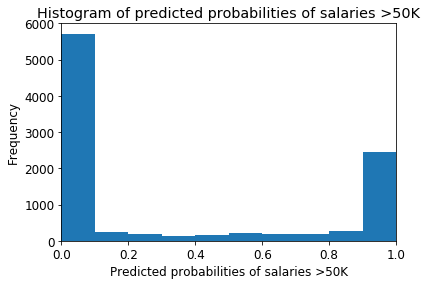

In [73]:
# plot histogram of predicted probabilities

# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of salaries >50K')


# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of salaries >50K')
plt.ylabel('Frequency')

### Observations

* We can see that the above histogram is highly positive skewed.

* The first column tell us that there are approximately 5700 observations with probability between 0.0 and 0.1 whose salary is <=50K.

* There are relatively small number of observations with probability > 0.5.

* So, these small number of observations predict that the salaries will be >50K.

* Majority of observations predcit that the salaries will be <=50K.

# ROC Curve

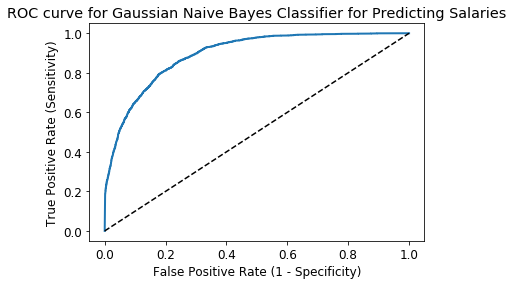

In [74]:
# plot ROC curve to shows the performance of a classification model at various classification threshold levels.

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = '>50K')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Gaussian Naive Bayes Classifier for Predicting Salaries')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

# ROC AUC

In [75]:
# print ROC AUC to calculate the percentage of the ROC plot that is underneath the curve.

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC:' , ROC_AUC)

ROC AUC: 0.8940832452812846


### Interpretation

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether the salary is >50K or not.

In [76]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(gnb, x_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC:' , Cross_validated_ROC_AUC)

Cross validated ROC AUC: 0.8937721688303542


## k-Fold Cross Validation

In [77]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gnb, x_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:' , scores)

Cross-validation scores: [0.81359649 0.80438596 0.81175954 0.8056165  0.79596314 0.79684072
 0.81044318 0.81175954 0.80210619 0.81044318]


In [78]:
# compute Average cross-validation score

print('Average cross-validation score:' , scores.mean())

Average cross-validation score: 0.8062914443854259


### Interpretation


* Using the mean cross-validation, we can conclude that we expect the model to be around 80.63% accurate on average.

* If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training.

* Our original model accuracy is 0.8083, but the mean cross-validation accuracy is 0.8063. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.

# Results and conclusion


1. In this project, I build a Gaussian Naïve Bayes Classifier model to predict whether a person makes over 50K a year. The model yields a very good performance as indicated by the model accuracy which was found to be 0.8083.


2. The training-set accuracy score is 0.8067 while the test-set accuracy to be 0.8083. These two values are quite comparable. So, there is no sign of overfitting.


3. I have compared the model accuracy score which is 0.8083 with null accuracy score which is 0.7582. So, we can conclude that our Gaussian Naïve Bayes classifier model is doing a very good job in predicting the class labels.


4. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a very good job in predicting whether a person makes over 50K a year.


5. Using the mean cross-validation, we can conclude that we expect the model to be around 80.63% accurate on average.


6. If we look at all the 10 scores produced by the 10-fold cross-validation, we can also conclude that there is a relatively small variance in the accuracy between folds, ranging from 81.35% accuracy to 79.64% accuracy. So, we can conclude that the model is independent of the particular folds used for training.


7. Our original model accuracy is 0.8083, but the mean cross-validation accuracy is 0.8063. So, the 10-fold cross-validation accuracy does not result in performance improvement for this model.